<a href="https://colab.research.google.com/github/Nikhilkumarpatro/Azure-Data-Engineering-Project/blob/main/feedforward_nn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
df[df['Outcome']==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [20]:
df[df['Outcome']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


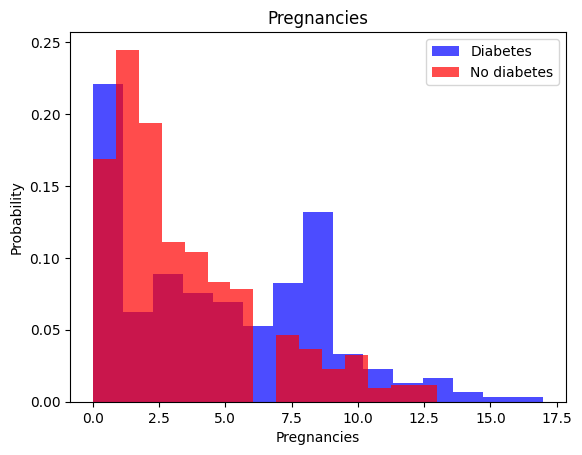

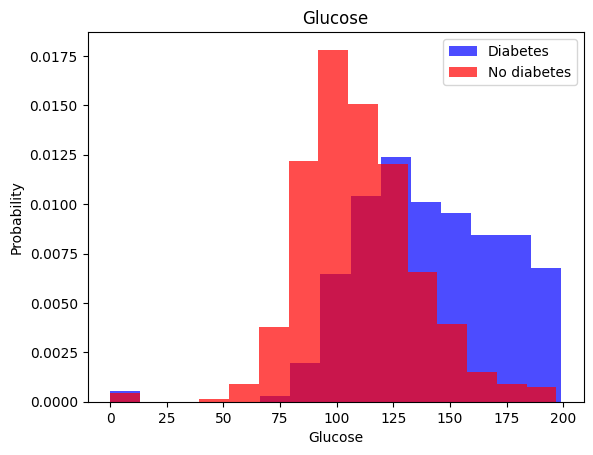

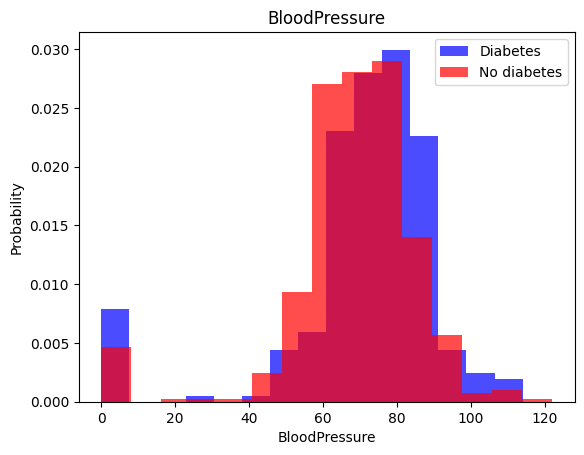

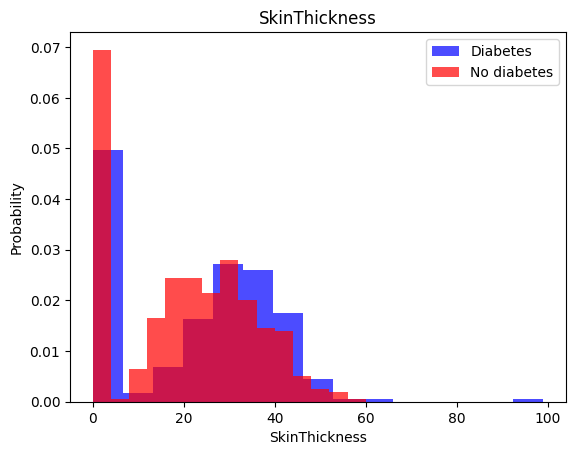

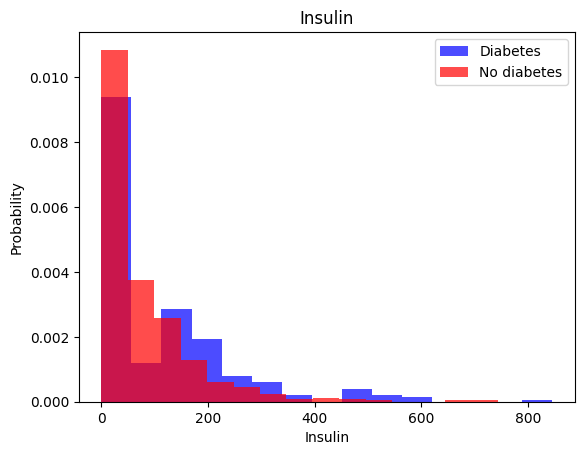

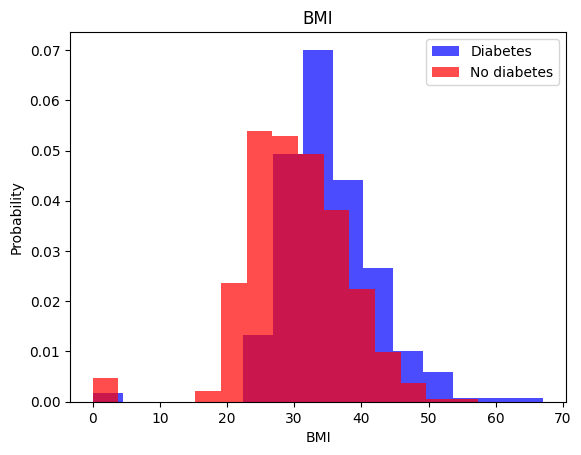

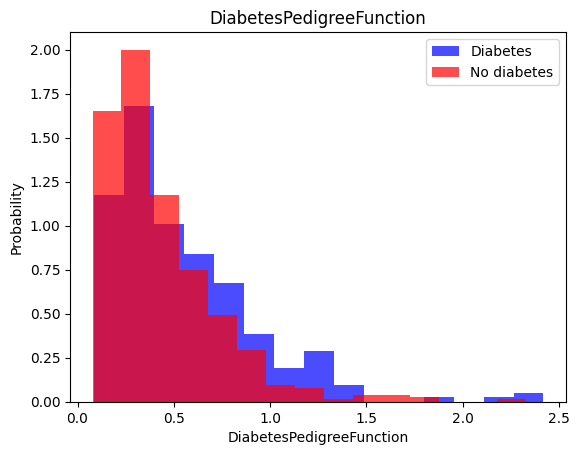

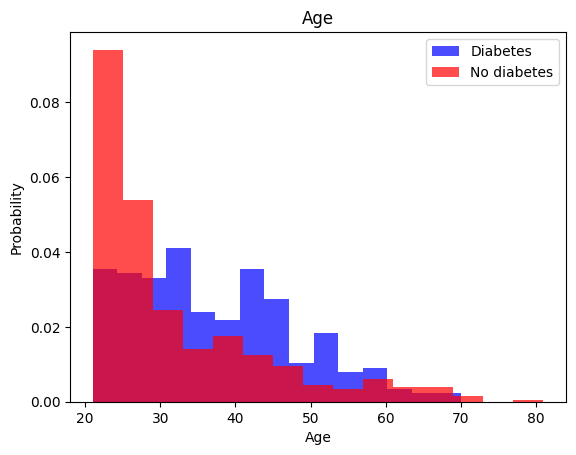

In [12]:
for i in range(len(df.columns[ :-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue' , label="Diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red' , label="No diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [20]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [21]:
x.shape, y.shape

((768, 8), (768,))

In [22]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
# Reshape y to have 2 dimensions with a single column
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [23]:
over = RandomOverSampler(random_state=0)
x, y = over.fit_resample(x, y)

In [24]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(268, 500)

In [25]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [26]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(256, activation='relu'),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(1, activation="sigmoid")
])

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [28]:
model.evaluate(x_train, y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5279 - loss: 0.6820   


[0.6843456625938416, 0.5049999952316284]

In [72]:
model.evaluate(x_valid, y_valid)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3720 - loss: 2.3801 


[2.2599551677703857, 0.40909090638160706]

In [29]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6596 - loss: 0.6105 - val_accuracy: 0.7850 - val_loss: 0.4469
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7373 - loss: 0.4988 - val_accuracy: 0.7850 - val_loss: 0.4224
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7663 - loss: 0.4884 - val_accuracy: 0.8100 - val_loss: 0.4053
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7980 - loss: 0.4362 - val_accuracy: 0.8250 - val_loss: 0.4118
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7924 - loss: 0.4273 - val_accuracy: 0.8350 - val_loss: 0.3951
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8167 - loss: 0.4077 - val_accuracy: 0.8250 - val_loss: 0.4057
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8414 - loss: 0.4210 - val_accuracy: 0.8300 - val_loss: 0.3863
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7993 - loss: 0.4308 - val_accuracy: 0.8450 - val_loss

In [30]:
model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7868 - loss: 0.4795


[0.5241740345954895, 0.7699999809265137]